<a href="https://colab.research.google.com/github/WinnieAnyoso/week-2-IP-core-/blob/master/week2_Independent_project_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In order to work on the above problem, you need to do the following:

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question


# Define the Problem

In this project, we will analyze the dataset containing data on financial services that are used by individuals across 4 east African countries. One of the goals of the project is to describe the most used financial services. Doing so would equip the distributor with insights 

The dataset for this project can be found on the UCI Machine Learning Repository.

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. We shall get insights on the customer spending
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate, bivariate and multivariate analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements.

## 1. Reading the Data

In [2]:
# importing necessary libraries 
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
#upload the data 
df = pd.read_csv("http://bit.ly/FinancialDataset")
#reading the data 
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 2. Data Exploration 

In [4]:
# getting sample from data 
df.sample(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
20640,Tanzania,2017,uniqueid_5838,No,Rural,Yes,3.0,17.0,Female,Other non-relatives,Divorced/Seperated,Primary education,Formally employed Private
13621,Rwanda,2016,uniqueid_7554,No,Rural,No,6.0,17.0,Male,Child,NaN,Secondary education,Remittance Dependent
11557,Rwanda,2016,uniqueid_5490,Yes,Rural,Yes,2.0,81.0,Female,Head of Household,Widowed,No formal education,Farming and Fishing
20765,Tanzania,2017,uniqueid_5963,No,Urban,Yes,1.0,20.0,Female,Spouse,Single/Never Married,Secondary education,Self employed
13368,Rwanda,2016,uniqueid_7301,No,Rural,No,1.0,75.0,Female,Head of Household,Widowed,No formal education,Farming and Fishing


In [5]:
# statistical summary 
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [6]:
# information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [7]:
# shape of the dataset 
df.shape

(23524, 13)

- Dataset has 23524 records abd 13 variables 

## 3. Tidying up the data 

In [ ]:
# checking for duplicate values 
df.duplicated().any()

False

In [ ]:
# checking for null values 
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

* There are a number of null values with only 2 columns having no null values 

In [ ]:
# progating null values forward
df.dropna(inplace= True)


In [ ]:
# checking for any null values after progating values 
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
df.nunique()

country                      4
year                         6
uniqueid                  8687
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64


## 4. EDA



> # a) Univariate analysis



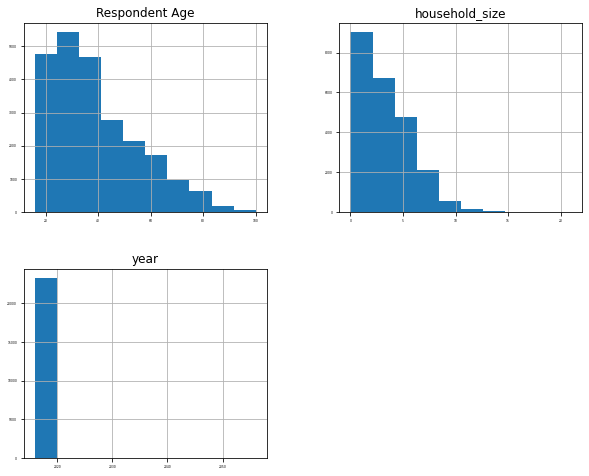

In [ ]:
# histograms 
df.hist(figsize=(10,8), sharex=False, sharey=False, xlabelsize=3, ylabelsize=3)
plt.show()



*   All columns have data skewed to the right


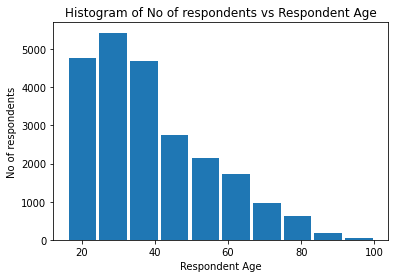

In [ ]:
# bar chart 
Age = df['Respondent Age']
plt.hist(Age, bins=10, histtype='bar',  rwidth=0.9 )
plt.xlabel('Respondent Age')
plt.ylabel('No of respondents')
plt.title('Histogram of No of respondents vs Respondent Age')
plt.show()

* Most of the respondents were betwwn 15 and 50. We see an age decline in the number of respondents as we move from 50 all the way to 80+

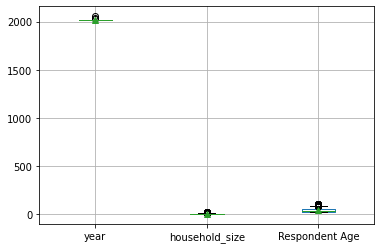

In [ ]:
# box plot
df.boxplot(showmeans=True)

* The box plot shows that there are a number of outliers in the numerical values. ie the age, household size and the year. 

* This however, could be as a result of a true recording that was made or an error during data entry. At this point it is nt clear yet. 


In [ ]:
# frequency table for type of job
df['Type of Job'].value_counts()

Self employed                   6361
Informally employed             5550
Farming and Fishing             5422
Remittance Dependent            2509
Other Income                    1077
Formally employed Private       1048
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: Type of Job, dtype: int64

* Above gives the frequency for each variable in the Type of job column 


In [ ]:
# frequency table for level of education
df['Level of Educuation'].value_counts()

Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: Level of Educuation, dtype: int64

In [ ]:
# frequency table for marital status
df['Level of Educuation'].value_counts()



Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: Level of Educuation, dtype: int64

In [11]:
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [12]:
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [14]:
numerical_columns =['household_size','Respondent Age']
categorical_columns =['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access','gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job']




>  # Measures of central tendency



In [15]:
# Mean
for column in numerical_columns:
  print('\n')
  print(column + ': ' + str(df[column].mean()))



household_size: 3.6818181818181817


Respondent Age: 38.804299702000854


* Mean household size for the respondents is 3.6 households while that of the respondent age is 38.8

In [16]:
# median 
for column in numerical_columns:
  print('\n')
  print(column + ': ' + str(df[column].median()))




household_size: 3.0


Respondent Age: 35.0


In [17]:
# Mode 
for column in numerical_columns:
  print('\n')
  print(column + ': ' + str(df[column].mode()))



household_size: 0    2.0
dtype: float64


Respondent Age: 0    30.0
dtype: float64


The most occuring age and respondent age is 2 and 30 respectively. 

In [18]:
# interquatile ranges 
for column in numerical_columns:
  print('\n')
  print(df[column].quantile([0.25, 0.5, 0.75]))




0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent Age, dtype: float64


In [19]:
# Standard deviation, Variance, Skewness and Kurtosis
for column in numerical_columns:
  print('\n')
  print(column + ', std: '+ str(df[column].std()))
  print(column + ', var: '+ str(df[column].var()))
  print(column + ', skew: '+ str(df[column].skew()))
  print(column + ', kurtosis: '+ str(df[column].kurt()))



household_size, std: 2.279933399631944
household_size, var: 5.198096306757275
household_size, skew: 0.977652354434429
household_size, kurtosis: 1.1581542795310726


Respondent Age, std: 16.51999610879876
Respondent Age, var: 272.9102714347262
Respondent Age, skew: 0.8418012375387167
Respondent Age, kurtosis: 0.10110811880734305


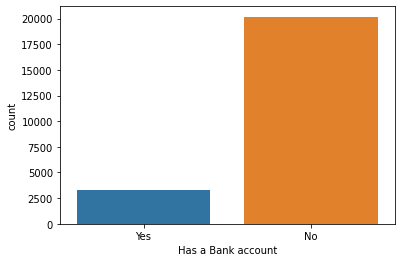

In [21]:
# plot showing those who have a bank account.
sns.countplot(df['Has a Bank account'])

* From the data, the number of respondents without a bank account exceeds that of those with a bank account. However, there should be consideraions like, in this region where the study was done, there are mobile money services. For example in Kenya there is M-Pesa which provides mobile banking services which then leads to a decline in the need for a bank account. 

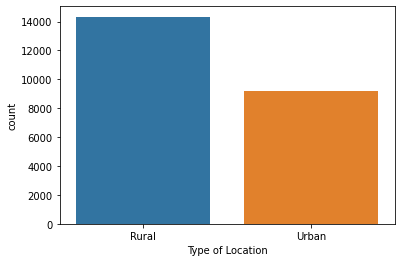

In [24]:
# plot showing the count in various types of locations
sns.countplot(df['Type of Location'])

* There were more respondents from the rural area as compared to the resondents captured in the urban area. 

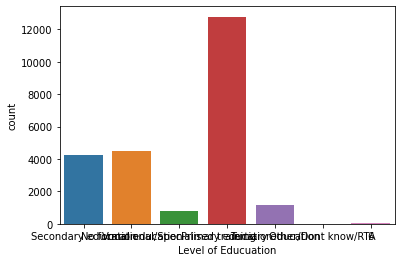

In [42]:
# a graph showing the count of the respondents based on their education level.
sns.countplot(df['Level of Educuation'])

* More respondents had a primary level of education. Level of education is a big contributor to one having a bank account or not. 

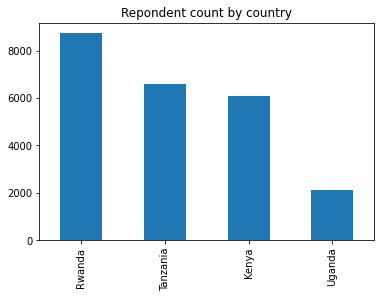

In [30]:
# checking the countries based on their respondent counts using a bar chart 

df['country'].value_counts().plot.bar()
plt.title('Repondent count by country')
plt.show()

* Rwanda had the highest number of respondents and Uganda having the least number of respondents


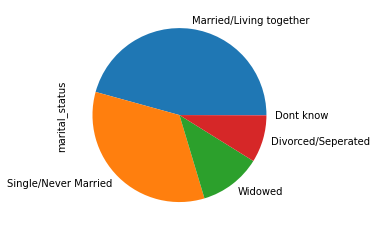

In [32]:
# the marital status distribution based on the value counts of respondents

df['marital_status'].value_counts().plot.pie()

* Most respondentd were either married or living together. 

In [36]:
# getting the statitical summaries for the data.
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000




> # b) Bivariate Analysis



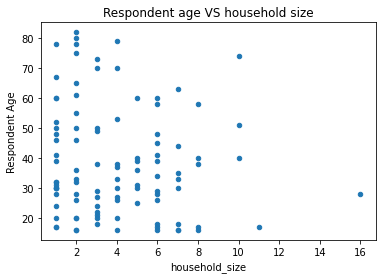

pearsons coefficient= -0.11970919507762415


In [ ]:
 # scatter 
 df.sample(100).plot.scatter(x = 'household_size', y = 'Respondent Age')
plt.title('Respondent age VS household size')
plt.show()

# pearson's coefficient 
coeff = df["household_size"].corr(df["Respondent Age"]) 
print('pearsons coefficient=',coeff)



*   there's a weak negative correlation between household size and respondent age



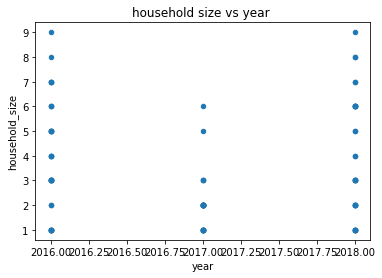

pearsons coefficient= -0.048901996192637645


In [ ]:
 # scatter 
 df.sample(100).plot.scatter(x = 'year', y = 'household_size')
plt.title('household size vs year ')
plt.show()

# pearson's coefficient 
coeff = df["year"].corr(df["household_size"]) 
print('pearsons coefficient=',coeff)

*   there's a weak negative correlation between household size and respondent age


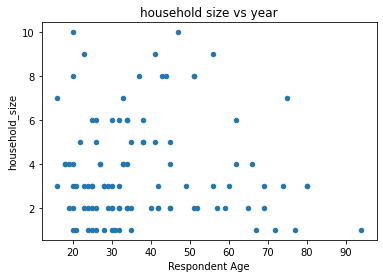

pearsons coefficient= -0.11970919507762415


In [ ]:
 # scatter 
 df.sample(100).plot.scatter(x = 'Respondent Age', y = 'household_size')
plt.title('household size vs year')
plt.show()

# pearson's coefficient 
coeff = df["Respondent Age"].corr(df["household_size"]) 
print('pearsons coefficient=',coeff)

In [ ]:
# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind

# Defining our scores...x and y
y = df['household_size']
x = df['Respondent Age']

# Then calculating the t-test
t_statistic, p_value = ttest_ind(x, y)

# Then displaying the t-statistic
t_statistic

321.7270468155308

In [ ]:
from scipy import stats
stats.zscore(df['household_size'])

array([-0.30188629,  0.57487037,  0.57487037, ...,  0.57487037,
        1.45162703,  2.76676201])

In [34]:
# correlation matrix for numerical columns 

x = df.corr()
x

,year,household_size,Respondent Age
year,1.000000,-0.049344,-0.019570
household_size,-0.049344,1.000000,-0.119709
Respondent Age,-0.019570,-0.119709,1.000000


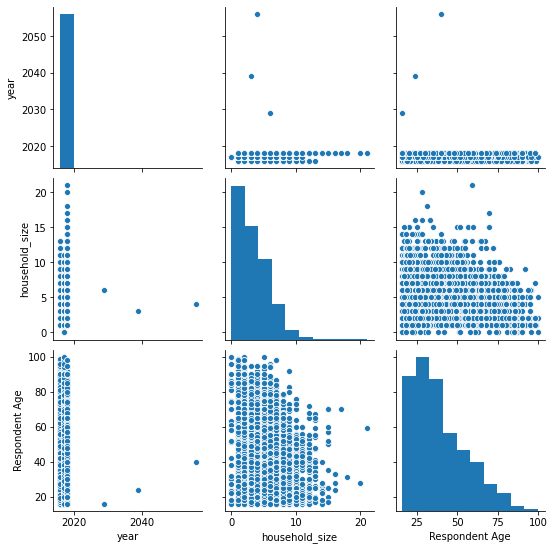

In [38]:
# pair plots for the numerical columns 
sns.pairplot(df)
plt.show()

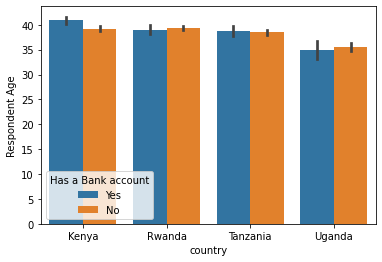

In [39]:
# creating subplots for the categorical columns based on whether or not
# they have a bank account 
sns.barplot(x='country', y='Respondent Age', hue ='Has a Bank account', data = df)



> # c) Multivariate Analysis



No handles with labels found to put in legend.


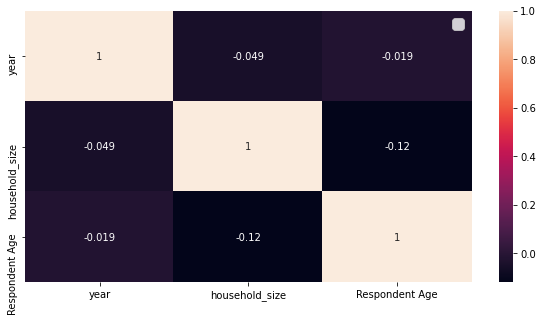

In [ ]:
corr = df.corr()

plt.figure(figsize = (10,5))
ax = sns.heatmap(corr, annot=True)
ax.legend(loc=0, prop={'size': 15})

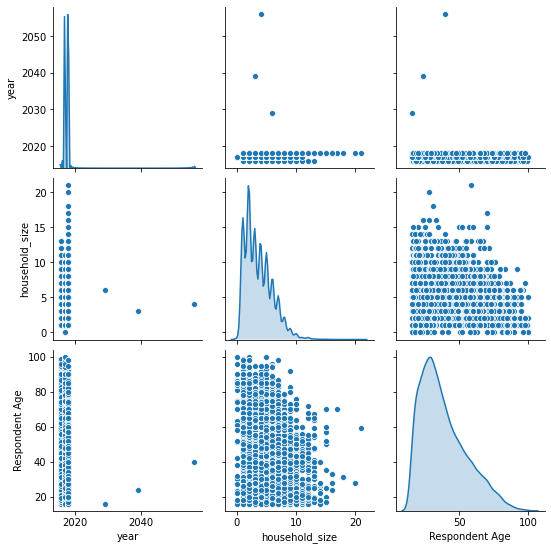

In [ ]:
# pairplot
sns.pairplot(df, diag_kind = 'kde')

In [ ]:
# preparing our datasets for analysis, we convert some of the columns from strings to values
# for easy comparisons

#METHOD 1, Encoding columns one by one (transformation one by one)
df["gender_of_respondent"] = np.where(df["gender_of_respondent"].str.contains("Male", "Female"), 1, 0)

df["Cell Phone Access"] = np.where(df["Cell Phone Access"].str.contains("Yes", "No"), 1, 0)

df["Has a Bank account"] = np.where(df["Has a Bank account"].str.contains("Yes", "No"), 1, 0)

df["Type of Location"] = np.where(df["Type of Location"].str.contains("Rural", "Urban"), 1, 0)

df.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1,1,1,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,1,0,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,0,1,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,1,1,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,0,0,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df["The relathip with head"].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [ ]:
# METHOD 2 ( We will use this one  for the rest ), Encoding all stringed data at once(transformation)

import sklearn as sk
from sklearn import preprocessing 
from sklearn.preprocessing import OrdinalEncoder
e = sk.preprocessing.LabelEncoder
le = preprocessing.LabelEncoder()
# assigning the transformed dataframe to 'a'
a = df.apply(e().fit_transform)
a



,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,2,0,1,0,1,3,8,0,5,2,4,9
1,0,2,1111,0,0,0,5,54,0,1,4,1,4
2,0,2,2222,1,1,1,5,10,1,3,3,6,9
3,0,2,3333,0,0,1,5,18,0,1,2,3,3
4,0,2,4444,0,1,0,8,10,1,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2,1239,0,0,1,4,32,0,1,0,1,7
23520,3,2,1240,0,0,1,2,11,0,1,3,4,7
23521,3,2,1241,0,0,1,5,11,0,4,4,3,7
23522,3,2,1242,0,1,1,7,14,0,4,0,4,9


In [ ]:
df.drop(["The relathip with head"], axis= 1)

In [ ]:
X = a.iloc[:,4:13].values
y = a.iloc[:, 4].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# using the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
#X_train = lda.fit_transform(X_train, y_train)
#X_test = lda.transform(X_test)
#
lda_ = lda.fit(X_train, X_test)
lda_x_train = lda_.transform(x_train)
lda_.coef_
#
#lda = LDA(n_components=1)
#X_train = lda.fit_transform(X_train, y_train)
#X_test = lda.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[2851    0]
 [   0 1818]]
Accuracy1.0
